In [0]:
# Python Text Analysis With the Schrutepy Package
# Tutorial: https://towardsdatascience.com/python-text-analysis-with-the-schrutepy-package-234bc70f3916

In [0]:
from schrutepy import schrutepy

In [7]:
# Load entire script for The Office into dataframe
df = schrutepy.load_schrute()
df.head()

,index,season,episode,episode_name,director,writer,character,text,text_w_direction
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,All right Jim. Your quarterlies look very good...,All right Jim. Your quarterlies look very good...
1,2,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Oh, I told you. I couldn't close it. So...","Oh, I told you. I couldn't close it. So..."
2,3,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,So you've come to the master for guidance? Is ...,So you've come to the master for guidance? Is ...
3,4,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Jim,"Actually, you called me in here, but yeah.","Actually, you called me in here, but yeah."
4,5,1,1,Pilot,Ken Kwapis,Ricky Gervais;Stephen Merchant;Greg Daniels,Michael,"All right. Well, let me show you how it's done.","All right. Well, let me show you how it's done."


In [0]:
# Elementary Text Analysis
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import nltk
from nltk.corpus import stopwords
from PIL import Image
import numpy as np
import collections
import pandas as pd

In [0]:
# Drop records that don't have dialogue
df = df.dropna()

In [10]:
# Join all of the text together
text = " ".join(line for line in df.text)   # Joins spaces and words

# Check
print(f'There are {len(text)} words in the whole script')

There are 3001517 words in the whole script


In [11]:
# Create stopwords list
# NLTK's stopwords https://gist.github.com/sebleier/554280
nltk.download('stopwords')
stopWords = set(stopwords.words('english'))       # Access english stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopWords, background_color='white').generate(text)

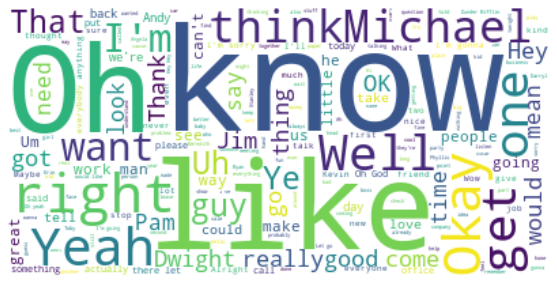

In [14]:
# Display generated image
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

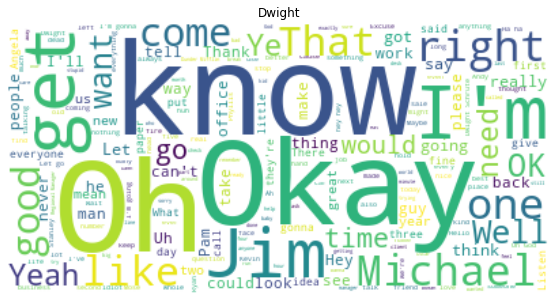

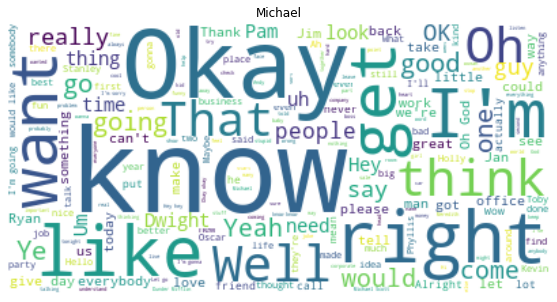

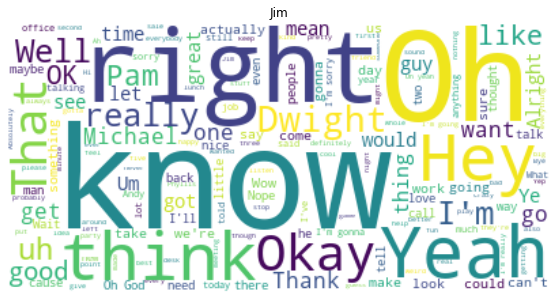

In [16]:
# Create function that plots wordclouds for individual characters
def plotDunder(character, df):          # Function takes a character and dataset
  mydf = df[df.character == character]
  text1 = " ".join(line for line in mydf.text)
  # Generate wordcloud
  wordcloud = WordCloud(stopwords=stopWords, background_color='white').generate(text1)

  # Display image
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(character)
  plt.axis('off')
  plt.show

# List of characters
favorite_character = ['Dwight', 'Michael', 'Jim']

# Loop characters through function
for i in favorite_character:
  plotDunder(i, df)

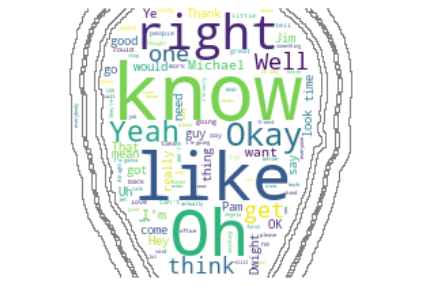

In [20]:
# Include mask of Dwight's head in cloud
dwight_mask = np.array(Image.open('dwight-schrute-png-300x200.png'))   # Numpy arrays can store images

# Create cloud
masked_cloud = WordCloud(background_color='white', max_words=100, mask=dwight_mask, stopwords=stopWords, contour_width=1, contour_color='grey')

# Generate cloud
masked_cloud.generate(text)   # Word Clouds have a generate() method

# Show cloud
plt.figure(figsize=(10,5))
plt.imshow(masked_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()